In [26]:
from typing import List, Tuple, Any, Optional
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)

In [27]:
class Bandit:
    def __init__(self, mu: float, std: float, Q: float = 0.0, alpha: float = 0.1):
        self._mu = mu
        self._std = std
        self._Q = Q
        self._alpha = alpha

    def pull(self) -> float:
        return np.random.normal(loc=self._mu, scale=self._std)

    def update(self, r: float):
        self._Q += self._alpha * (r - self._Q)

    @property
    def true_mean(self) -> float:
        return self._mu

    @property
    def Q(self) -> float:
        return self._Q

In [28]:
def single_run(
    bandits: List[Bandit], n_steps: int, eps: float
) -> Tuple[np.ndarray, np.ndarray]:
    """Performs a single run"""

    rewards = np.zeros(n_steps)
    optimals = np.zeros(n_steps)

    for i in range(n_steps):
        cur_optimal_bandit = np.argmax([b.true_mean for b in bandits])
        if np.random.rand() < eps:
            bandit = np.random.choice(len(bandits))
        else:
            bandit = np.argmax([b.Q for b in bandits])

        bandit = int(bandit)
        reward = bandits[bandit].pull()
        bandits[bandit].update(reward)
        rewards[i] = reward
        optimals[i] = 1 if bandit == cur_optimal_bandit else 0

    return rewards, optimals

In [29]:
def run_experiment(
    true_means: np.ndarray,
    true_stds: np.ndarray,
    n_runs: int,
    n_steps: int,
    eps: float = 0.1,
    Q1: float = 0.0,
    alpha: float = 0.1,
) -> Tuple[np.ndarray, np.ndarray]:
    all_rewards = np.zeros((n_runs, n_steps))
    all_optimals = np.zeros((n_runs, n_steps))

    for i in range(n_runs):
        bandits = [
            Bandit(mu=mu, std=std, Q=Q1, alpha=alpha)
            for (mu, std) in zip(true_means, true_stds)
        ]
        rewards, optimals = single_run(bandits=bandits, n_steps=n_steps, eps=eps)
        all_rewards[i] = rewards
        all_optimals[i] = optimals

    return all_rewards.mean(axis=0), all_optimals.mean(axis=0)

In [30]:
K = 10
MEANS = np.random.randn(K)
STDS = np.random.rand(K)
N_STEPS = 1000
N_RUNS = 2000

In [31]:
exp1_rewards, exp1_optimals = run_experiment(MEANS, STDS, N_RUNS, N_STEPS)
exp2_rewards, exp2_optimals = run_experiment(
    MEANS, STDS, N_RUNS, N_STEPS, eps=0.0, Q1=5
)

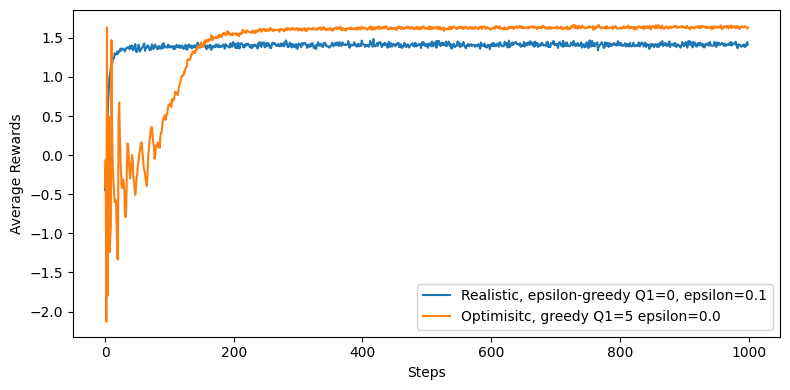

In [32]:
plt.figure(figsize=(8, 4))
plt.plot(exp1_rewards, label="Realistic, epsilon-greedy Q1=0, epsilon=0.1")
plt.plot(exp2_rewards, label="Optimisitc, greedy Q1=5 epsilon=0.0")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Average Rewards")
plt.tight_layout()
plt.show()

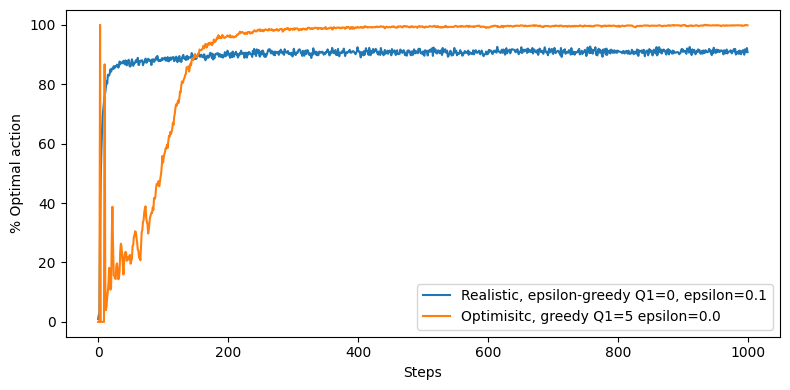

In [33]:
plt.figure(figsize=(8, 4))
plt.plot(exp1_optimals * 100, label="Realistic, epsilon-greedy Q1=0, epsilon=0.1")
plt.plot(exp2_optimals * 100, label="Optimisitc, greedy Q1=5 epsilon=0.0")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.tight_layout()
plt.show()